# Indexing and masking on xarray

In [7]:
#Import xarray
import xarray as xr
#Other useful Python libraries
import os
import matplotlib.pyplot as plt
import numpy as np

# This is what the display will look like on Sublime so we'll change our display style to reflect that
xr.set_options(display_style="text")

Load in the SST data and save the necessary variables

In [8]:
#Change to path of directory
dataPath = '/Users/brownscholar/Desktop/2020_BridgeUP_Internships/Data'
os.chdir(dataPath)
os.getcwd()

'/Users/brownscholar/Desktop/2020_BridgeUP_Internships/Data'

In [9]:
os.getcwd()

'/Users/brownscholar/Desktop/2020_BridgeUP_Internships/Data'

In [11]:
# Load the sea surface temperature dataset
fileName = 'HadISST_sst.nc'
sstdata = xr.open_dataset(fileName)

#Save the necessary variables
sst = sstdata.sst
lat = sstdata.sst.latitude
lon = sstdata.sst.longitude
time = sstdata.sst.time

### Refresher on list indexing

For the provided list, find
1. the first and last element
1. second half of the list

In [12]:
test_list = [i for i in range(2,42,2)] #does the same thing as appending values to a list
test_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

In [13]:
#first and last element
test_list[0]

2

In [14]:
test_list[19]

40

In [15]:
#second half of list
len(test_list)

20

In [16]:
test_list[19:20]

[40]

### Indexing NumPy arrays

Lists are only useful when storing one dimensional data. For multidimensional data, we would use NumPy arrays instead. 

In [17]:
#Create dataset
x = np.arange(-5,5)
y = x
X, Y = np.meshgrid(x,y)
data = X**2 + Y**2
data

array([[50, 41, 34, 29, 26, 25, 26, 29, 34, 41],
       [41, 32, 25, 20, 17, 16, 17, 20, 25, 32],
       [34, 25, 18, 13, 10,  9, 10, 13, 18, 25],
       [29, 20, 13,  8,  5,  4,  5,  8, 13, 20],
       [26, 17, 10,  5,  2,  1,  2,  5, 10, 17],
       [25, 16,  9,  4,  1,  0,  1,  4,  9, 16],
       [26, 17, 10,  5,  2,  1,  2,  5, 10, 17],
       [29, 20, 13,  8,  5,  4,  5,  8, 13, 20],
       [34, 25, 18, 13, 10,  9, 10, 13, 18, 25],
       [41, 32, 25, 20, 17, 16, 17, 20, 25, 32]])

Our data looks a little bit like a grid. Say we want the element in the **first** row and **second** column i.e 41

In [18]:
data[0,1] #data[first row, second column]

41

Find the index for 0 in the dataset

In [19]:
data[5,5]

0

Print out the first 3 columns. 

*Hint:* To output everything in a dimension, you would use `:`

In [20]:
data[0:3]

array([[50, 41, 34, 29, 26, 25, 26, 29, 34, 41],
       [41, 32, 25, 20, 17, 16, 17, 20, 25, 32],
       [34, 25, 18, 13, 10,  9, 10, 13, 18, 25]])

### Indexing on xarray

xarray saves its multidimensional data as NumPy arrays but has some additional functionalities.

First find the three dimensions of the SST dataset.

*Hint*: There's a pretty handy xarray method to do this!

In [21]:
fileName = 'HadISST_sst.nc'
sstdata = xr.open_dataset(fileName)
sstdata

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1811)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2020-1...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/1/2021 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [22]:
sstdata.dims

Frozen(SortedKeysDict({'time': 1811, 'nv': 2, 'latitude': 180, 'longitude': 360}))

Let's find SST of the first time period in the dataset (Jan 1870 or the 0th value of the time dimension) over the entire Earth or all the latitude and longitude values. 

This follows the same syntax as the 2D data we just worked with but now you have 3 dimensions!

In [23]:
sst[0,:,:]

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[-1000., -1000., -1000., ..., -1000., -1000., -1000.],
       [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
       [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]], dtype=float32)
Coordinates:
    time       datetime64[ns] 1870-01-16T11:59:59.505615234
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

Find the data for the first time period and the 89th and 90th latitude value. This is all the Jan 1870 temperature data along the equator. 

In [24]:
sst[0,80:91,:]

<xarray.DataArray 'sst' (latitude: 11, longitude: 360)>
array([[27.681282, 27.658577, 27.627037, ..., 27.756725, 27.694794, 27.677406],
       [27.959736, 27.94817 , 27.908386, ..., 27.990795, 27.929464, 27.927494],
       [28.142876, 28.143713, 28.11149 , ..., 28.188877, 28.114115, 28.104458],
       ...,
       [27.991665, 27.92338 , 27.878113, ..., 28.2034  , 28.163742, 28.096989],
       [28.010279, 27.919828, 27.86462 , ..., 28.264671, 28.230558, 28.148249],
       [28.118744, 28.015932, 27.965162, ..., 28.41475 , 28.378357, 28.278654]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 1870-01-16T11:59:59.505615234
  * latitude   (latitude) float32 9.5 8.5 7.5 6.5 5.5 4.5 3.5 2.5 1.5 0.5 -0.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

Figuring out what coordinates these index values correspond to can be tricky. xarray makes this easier with the `loc[]` method where you can specify the range of the actual coordinate values you want. The latitude values that come closest to the equator are 0.5N (0.5) and 0.5S (-0.5).

Using `loc[]`, the result above would be:

In [25]:
sst.loc['1870-01-16T11:59:59.505615234',0.5:-0.5,:] #the latitude values go from positive to negative or North to South

<xarray.DataArray 'sst' (latitude: 2, longitude: 360)>
array([[28.010279, 27.919828, 27.86462 , ..., 28.264671, 28.230558, 28.148249],
       [28.118744, 28.015932, 27.965162, ..., 28.41475 , 28.378357, 28.278654]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 1870-01-16T11:59:59.505615234
  * latitude   (latitude) float32 0.5 -0.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [26]:
#or even (making use of the powerful time indexing)
sst.loc['1870-01',0.5:-0.5,:]

<xarray.DataArray 'sst' (time: 1, latitude: 2, longitude: 360)>
array([[[28.010279, 27.919828, ..., 28.230558, 28.148249],
        [28.118744, 28.015932, ..., 28.378357, 28.278654]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234
  * latitude   (latitude) float32 0.5 -0.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

What about all temperature values along the equator for the year 1870?

In [ ]:
sst

Since we're studying the impact of the North Atlantic Oscillation on the ocean, we want to identify a good region to conduct our data analysis of ocean temperature over. What might that be?

Find the SST for this region.

### Masking on xarray

You might have noticed that parts of the SST data are marked with NaN (or Not a Number). These are the Earth's land masses; the regions generally whited out on a plot of the data. This data is **masked**.

We can create our own masks using the `where` method. Here, rather than specifying a range of values to index over, you specify a condition your data must meet. For example, all temperature values not equal to 30&deg;C.

Python conditions
* equals: `a == b`
* not equals: `a != b`
* less than: `a < b`
* less than or equal to: `a <= b`
* greater than: `a > b`
* greater than or equal to: `a >= b`

In [34]:
sst.where(sst != 30)

<xarray.DataArray 'sst' (time: 1811, latitude: 180, longitude: 360)>
array([[[-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        [-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        [-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        [-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        [-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        [-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        [-1000. , -1000. , -1000. , ..., -1000. , -1000. , -1000. ],
        ...,
...
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[   -1.8,    -1.8,    -1.8, ...,    -1.8,    -1.8,    -1.8],
        [   -1.8,    -1.8,    -1.8, ...,    -1.8,    -1.8,    -1.8],
        [   -1.8,    -1.8,    -1.8, ...,    -1.8,    -1.8,    -1.8],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[   -1.8,    -1.8,    -1.8, ...,    -1.8,    -1.8,    -1.8],
        [   -1.8,    -1.8,    -1.8, ...,    -1.8,    -1.8,    -1.8],
        [   -1.8,    -1.8,    -1.8, ...,    -1.8,    -1.8,    -1.8],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2020-1...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

Find all the SST values less than or equal 0&deg;C

In [35]:
sst.where(sst >= 0)

<xarray.DataArray 'sst' (time: 1811, latitude: 180, longitude: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2020-1...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [36]:
sst.mean(dim = "time")

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[-803.22327, -742.04224, -742.04224, ..., -799.916  , -800.4672 ,
        -800.4672 ],
       [-621.3359 , -621.8871 , -624.643  , ..., -620.78467, -619.6824 ,
        -620.7847 ],
       [-465.90424, -528.1882 , -533.7    , ..., -467.55777, -530.9441 ,
        -473.62076],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5

Plot the mean of this masked SST data using a contour plot

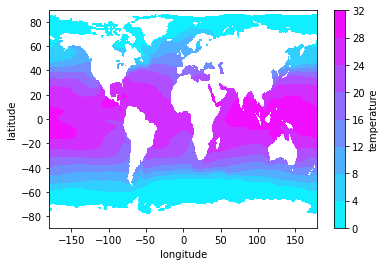

In [49]:
plt.figure()
plt.contourf(sst.longitude,sst.latitude,sst.where(sst >= 0).mean(dim="time"), cmap= "cool")
plt.colorbar(label = 'temperature')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

### Challenge

Plot the mean SST for the Northern Hemisphere.

*Hint*: You can set your conditions for SST based on your latitude values

In [53]:
#masking everything excpt atlantic ocean and later sea ice
atlantic1 = sst.where(sst.longitude <= 50)
atlantic2 = atlantic1.where(atlantic1.longitude >=-100)

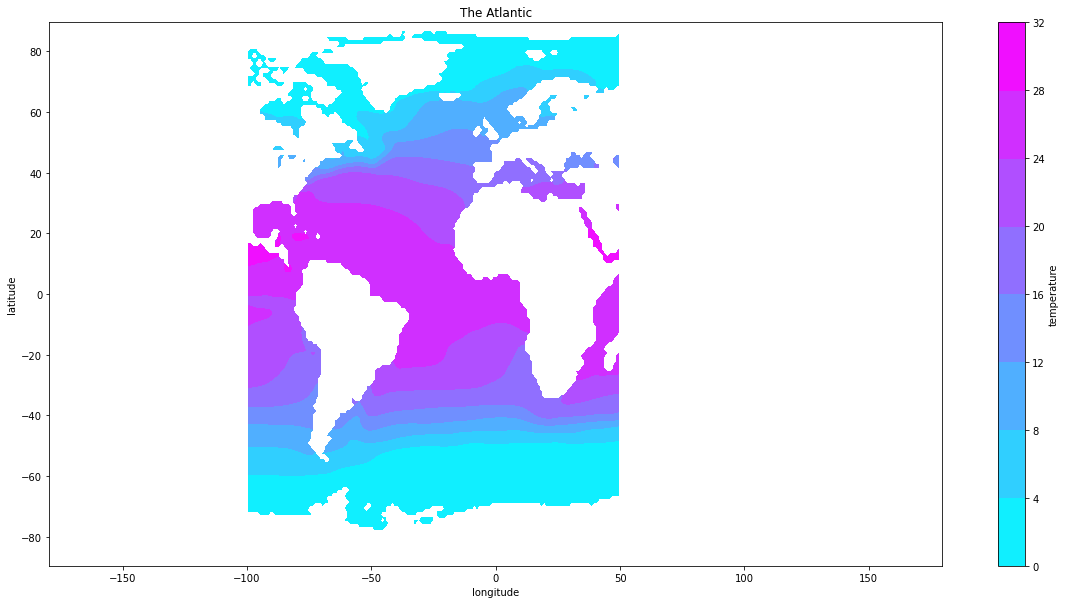

In [59]:
plt.figure(figsize = (20,10))
plt.contourf(atlantic2.longitude,atlantic2.latitude,atlantic2.where(sst >=0).mean(dim="time"), cmap = "cool")
plt.title("The Atlantic")
plt.colorbar(label = 'temperature')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [65]:
#mask sea ice
seaice = sst.where(sst >= -5)

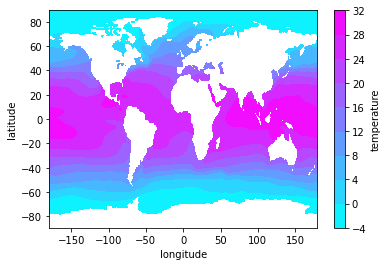

In [66]:
plt.figure()
plt.contourf(sst.longitude,sst.latitude,sst.where(sst >= -5).mean(dim="time"), cmap= "cool")
plt.colorbar(label = 'temperature')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [60]:
sst.dims

('time', 'latitude', 'longitude')